# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [4]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [5]:
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
],np.uint8)

def ero(image, kernel):
    result = image.copy()
    img_p = np.zeros((image.shape[0] + kernel.shape[0] - 1, image.shape[1] + kernel.shape[1] - 1))
    img_p[kernel.shape[0] - 2 : -1 :, kernel.shape[1] - 2 : -1 :] = image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            sum = (kernel * img_p[y : y + kernel.shape[0], x : x + kernel.shape[1]]).sum()
            if sum == kernel.sum() * 255:
                result[y, x] = 255      
            else:
                result[y, x] = 0
    return result
    
def dil(image, kernel):
    result = image.copy()
    img_p = np.zeros((image.shape[0] + kernel.shape[0] - 1, image.shape[1] + kernel.shape[1] - 1))
    img_p[kernel.shape[0] - 2 : -1 :, kernel.shape[1] - 2 : -1 :] = image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            sum = (kernel * img_p[y : y + kernel.shape[0], x : x + kernel.shape[1]]).sum()
            if sum > 0:
                result[y, x] = 255      
            else:
                result[y, x] = 0
    return result


def openning(image, kernel):
  img2 = image.copy()
  img_ero = ero(img2, kernel)
  result = dil(img_ero, kernel)
  return result


Implement this function to get the input image and return the skeleton of the input image.

In [6]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    res = image.copy()
    params = {}
    
    skeleton_list = []
    tt, res = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV) 
    s_k=np.zeros(shape=image.shape)
    ak = res - openning(res,kernel)
    skeleton_list.append(ak)
    s_k += ak
    x=0
    while 255 in ero(res, kernel):
      res = ero(res,kernel)
      x += 1
      res_open = openning(res,kernel)
      ak = res-res_open
      skeleton_list.append(ak)
      s_k += ak

    res = s_k
    params['K'] = x
    params['SK'] = s_k
    params['sks'] = skeleton_list
    
    return res, params

Test your implementation (don't change this cell).

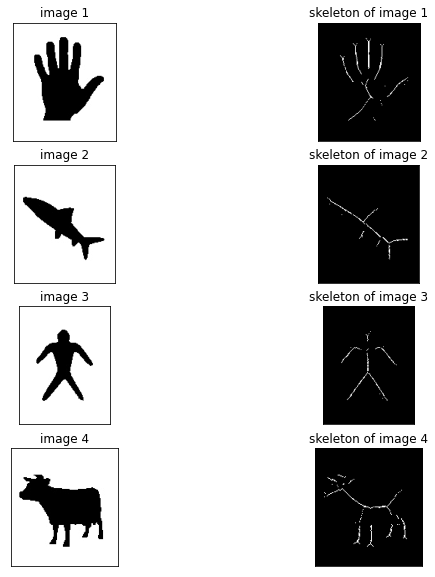

In [7]:
image_list = []

image1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [8]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    
    #Write your code here  
    skeleton_list = params['sks']
    k = params['K']
    x = skeleton_list[0]
    for i in range(1, k):
        sk = skeleton_list[i]
        for j in range(i):
            sk = dil(sk, kernel)
        x += sk

    return x

Test your implementation (don't change this cell).

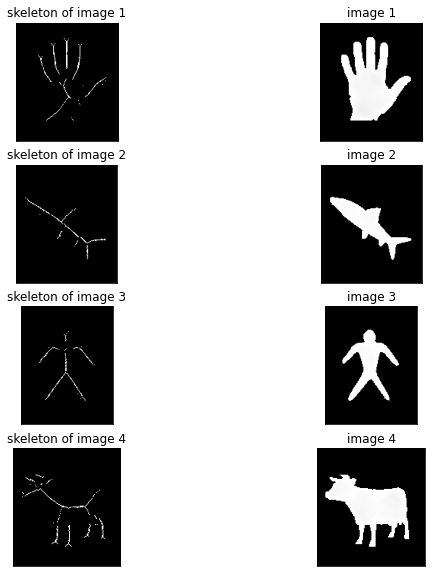

In [9]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [10]:
from google.colab.patches import cv2_imshow
import imutils

Implement this function to detect shapes and number of cars in an input image.

In [11]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = 0

    #Write your code here

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 18)
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)

    w_min = 26
    w_max = 400
    h_min = 10
    h_max = 200

    for c in contours: 
      rectangle = cv2.boundingRect(c)
      x0 = rectangle[0]
      y0 = rectangle[1]
      w = rectangle[2]
      h = rectangle[3]
      if w >= w_min and w<= w_max and h <= h_max and h >= h_min:
        cars_num += 1
        cv2.rectangle(result, (x0,y0), (x0+w,y0+h), (255,0,0), 2)
    
    return result, cars_num

Test your implementation (don't change this cell).

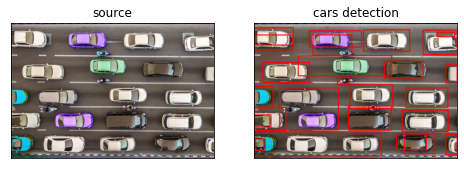

In [12]:
image_list = []
image = cv2.imread('img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [13]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = 0
    
    #Write your code here
    
    # thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 18)
    # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.6, 60, maxRadius=70)
    
    # circles = np.round(circles[0, :]).astype("int")

    # for x, y, r in circles:
    #     flowers_num += 1
    #     cv2.circle(result, (x, y), r, (255, 0, 0), 4)

    params = cv2.SimpleBlobDetector_Params()
    # # Change thresholds
    # params.minThreshold = 1
    # params.maxThreshold = 300

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 80
    params.maxArea = 9999999

    # # Filter by Circularity
    # params.filterByCircularity = True
    # params.minCircularity = 0

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.85

    # # Filter by Inertia
    # params.filterByInertia = True
    # params.minInertiaRatio = 0.01

    # OLD: detector = cv2.SimpleBlobDetector(params)
    detector = cv2.SimpleBlobDetector_create(params)

    keypoints= detector.detect(result)
    flowers_num = len(keypoints)
    result = cv2.drawKeypoints(result, keypoints, np.array([]), (255,0,0),
                               cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return result,flowers_num


number of sunflowers:  29


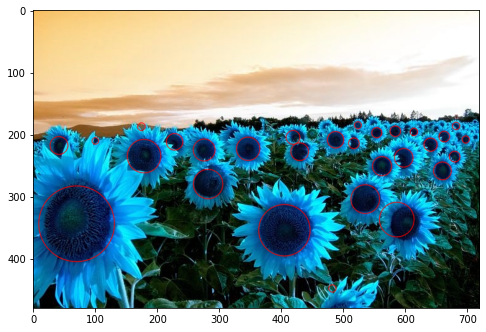

In [14]:
image = cv2.imread("img6.jpg")
detected = detect_flower_num(image)
cv2.imwrite("sunflower_detected.jpg", detected[0])
plt.imshow(detected[0])
print("number of sunflowers: ", detected[1])

Test your implementation (don't change this cell).

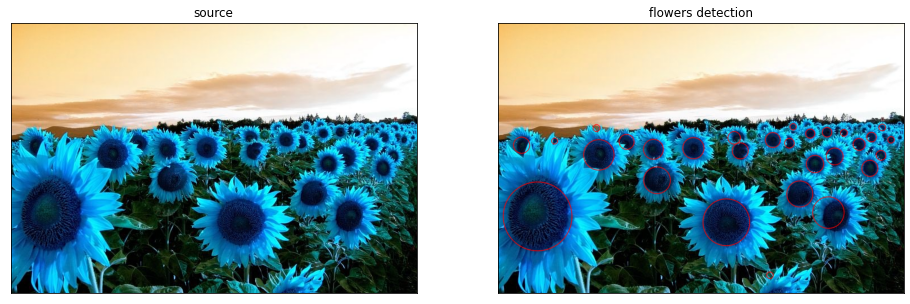

In [15]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 16, 12, 'Q4-b')

End!!!